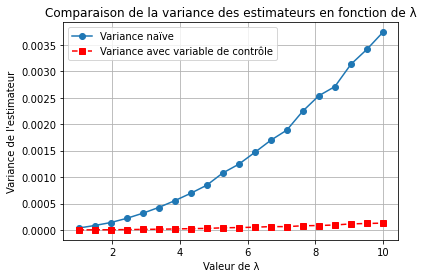

       Lambda  Réduction de variance (%)
0    1.000000                  96.466819
1    1.473684                  96.462603
2    1.947368                  96.542626
3    2.421053                  96.406856
4    2.894737                  96.523131
5    3.368421                  96.514818
6    3.842105                  96.560186
7    4.315789                  96.295193
8    4.789474                  96.462644
9    5.263158                  96.239706
10   5.736842                  96.286811
11   6.210526                  96.456372
12   6.684211                  96.220631
13   7.157895                  96.649428
14   7.631579                  96.452720
15   8.105263                  96.668391
16   8.578947                  96.526275
17   9.052632                  96.321262
18   9.526316                  96.404268
19  10.000000                  96.529517


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paramètres
k = 1.5  # Shape parameter
N = 10000  # Taille de l'échantillon
lambda_values = np.linspace(1, 10, 20)  # Différentes valeurs de λ

# Stockage des variances
variances_naive = []
variances_control = []
variance_reduction = []

# Expérience pour chaque λ
for lam in lambda_values:
    # Génération des échantillons
    U = np.random.uniform(0, 1, N)
    X = lam * (-np.log(U))**(1/k)  # Weibull(λ, k)
    Y = lam * (-np.log(U))  # Weibull(λ, 1) <=> Exponentielle(λ)

    # Espérance connue de Y
    E_Y = lam

    # Estimation naïve
    var_naive = np.var(X) / N
    variances_naive.append(var_naive)

    # Estimateur avec variable de contrôle
    beta_hat = np.cov(X, Y)[0, 1] / np.var(Y)
    var_control = np.var(X - beta_hat * (Y - E_Y)) / N
    variances_control.append(var_control)

    # Pourcentage de réduction de variance
    reduction = (1 - var_control / var_naive) * 100
    variance_reduction.append(reduction)

# Tracé des résultats
plt.plot(lambda_values, variances_naive, label="Variance naïve", marker="o", linestyle="-")
plt.plot(lambda_values, variances_control, label="Variance avec variable de contrôle", marker="s", linestyle="--", color="red")

plt.xlabel("Valeur de λ")
plt.ylabel("Variance de l'estimateur")
plt.title("Comparaison de la variance des estimateurs en fonction de λ")
plt.legend()
plt.grid(True)
plt.show()
